# **Prepare datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_table('/content/drive/My Drive/Colab Notebooks/Data/Texts.tsv', header=None)
df = df.rename(columns={0: 'text',1: 'label'})

In [ ]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [ ]:
df.shape

(11000, 2)

In [ ]:
df.label.value_counts()

positive    6416
negative    3436
neutral     1148
Name: label, dtype: int64

# **Text Normalization/Cleansing**

Lalu kita lakukan cleansing sebagai berikut

In [ ]:
import re 

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

In [ ]:
df['text_clean'] = df.text.apply(cleansing)

In [ ]:
df.head()

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...


# **Feature Extraction: Bag of Words**

In [ ]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df.text_clean.tolist()

In [ ]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [ ]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# **Prepare train & test datasets/Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

classes = df.label

In [ ]:
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10995    positive
10996    positive
10997     neutral
10998    negative
10999    positive
Name: label, Length: 11000, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# Training (Neural Network)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier() 
history=model.fit(X_train, y_train)

print ("Training selesai")

Training selesai


In [ ]:
prd_r = model.predict(X_test)
test_acc = accuracy_score(y_test, prd_r) * 100.
loss_values = model.loss_curve_

In [ ]:
pickle.dump(model, open("model.p", "wb"))

# **Evaluation**

In [ ]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test)) 

Testing selesai
              precision    recall  f1-score   support

    negative       0.82      0.79      0.80       700
     neutral       0.77      0.71      0.74       225
    positive       0.89      0.91      0.90      1275

    accuracy                           0.85      2200
   macro avg       0.82      0.81      0.81      2200
weighted avg       0.85      0.85      0.85      2200



## **Cross Validation**

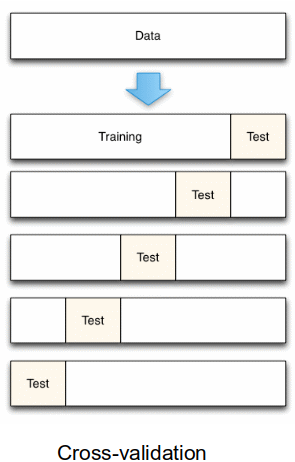

In [ ]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train,target_train)

    preds = clf.predict(data_test)

    # for the current fold only    
    accuracy = accuracy_score(target_test,preds)

    print("Training ke-", iteration)
    print(classification_report(target_test,preds))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.77      0.78      0.78       680
     neutral       0.77      0.63      0.69       239
    positive       0.87      0.90      0.88      1281

    accuracy                           0.83      2200
   macro avg       0.80      0.77      0.78      2200
weighted avg       0.83      0.83      0.83      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.79      0.75      0.77       706
     neutral       0.73      0.70      0.71       220
    positive       0.87      0.90      0.89      1274

    accuracy                           0.83      2200
   macro avg       0.80      0.78      0.79      2200
weighted avg       0.83      0.83      0.83      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80       682
     neutral       0.86      0.71      0.78       215
    positive       0.89      0

# Predict

In [ ]:
original_text =  '''
Keren banget
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

positive


In [ ]:
import pickle

original_text =  '''
Keren banget
'''

#Load Feature Extraction
count_vect = pickle.load(open("feature.p","rb"))

#Load Model Neural Network
model = pickle.load(open("model.p","rb"))

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

positive
